# Telco Customer Churn EDA

## 1. Problem Statement

### What is Customer Churn?
Customer churn refers to when a customer stops doing business with a company. In the telecom industry, this means a user cancels their subscription.

### Why is it important?
Acquiring new customers is often more expensive than retaining existing ones. By understanding why customers leave, companies can improve their services and offer targeted retention plans.

### Our Goal
We use historical customer data to find patterns and drivers of churn. This analysis prepares us to build a prediction model later.


## 2. Basic Data Checks

In [15]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set background graph style
plt.style.use('dark_background')

# import warnings to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
data = pd.read_csv(r'D:\Data Science Projects\Customer Churn Risk Scoring System\NoteBook\Data\Telco-Customer-Churn.csv')
# 1. Check Shape
print('Data Shape:', data.shape)

# 2. View first few rows
display(data.head())

# 3. Info to see column types and non-null counts
print('\nData Info:')
data.info()

# 4. Summary statistics for numeric columns
print('\nNumeric Summary:')
display(data.describe())

# 5. Unique values per column
print('\nUnique Values Count:')
print(data.nunique())

Data Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Unique Values Count:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### Insight
- The dataset contains 7043 rows and 21 columns.
- Most columns are categorical (object). `SeniorCitizen`, `tenure`, `MonthlyCharges` are numeric.
- **Issue**: `TotalCharges` is currently an object (string) type, but it should be numeric. This need to be fixed.
- `customerID` has 7043 unique values, confirming it acts as a primary key.


## 3. Data Cleaning & Quality

In [16]:
# a) Convert TotalCharges to numeric
# 'coerce' turns non-numeric values (like empty strings) into NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check how many missing values were created
print('Missing TotalCharges:', data['TotalCharges'].isnull().sum())

# b) Duplicate Check
duplicates = data.duplicated().sum()
print('Duplicate Rows:', duplicates)

# Check for duplicate CustomerIDs
id_duplicates = data['customerID'].duplicated().sum()
print('Duplicate CustomerIDs:', id_duplicates)

# Drop duplicates if any
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print('Duplicates dropped.')


Missing TotalCharges: 11
Duplicate Rows: 0
Duplicate CustomerIDs: 0


### Insight
- We successfully converted `TotalCharges` to numeric. Some values became NaN.
- There are no duplicate rows in the dataset.
- `customerID` is unique for every row, so the data is at the customer level.


## 4. Missing Values Analysis

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


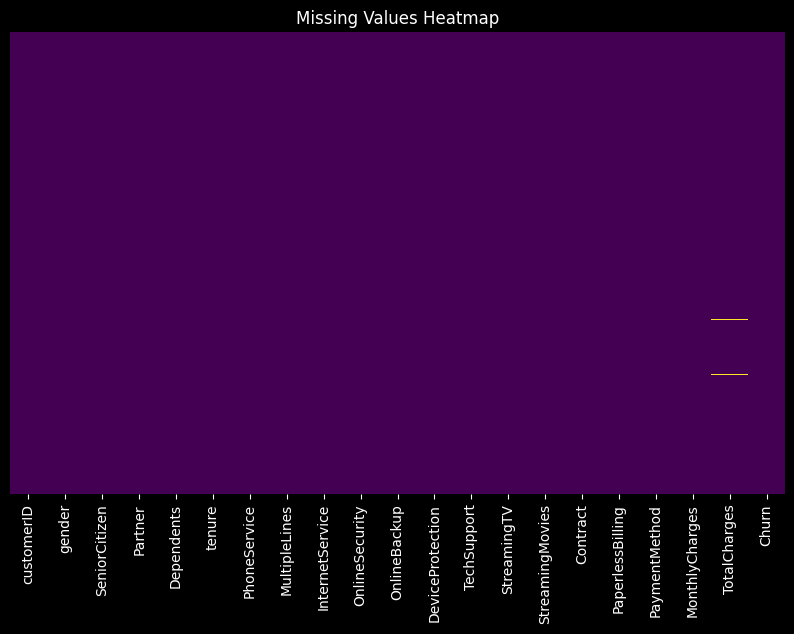

In [17]:
# Check missing values overall
print(data.isnull().sum())

# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### Insight
- Only `TotalCharges` has missing values (11 rows).
- These are likely new customers with 0 tenure. Since the number is very small, we can either drop them or fill with 0.
- For this analysis, we will simply drop these few rows to keep the data clean.

In [18]:
# Handling the missing values
data.dropna(subset=['TotalCharges'], inplace=True)
print('New Shape after dropping missing:', data.shape)

New Shape after dropping missing: (7032, 21)


## 5. Univariate Analysis – Numeric Features

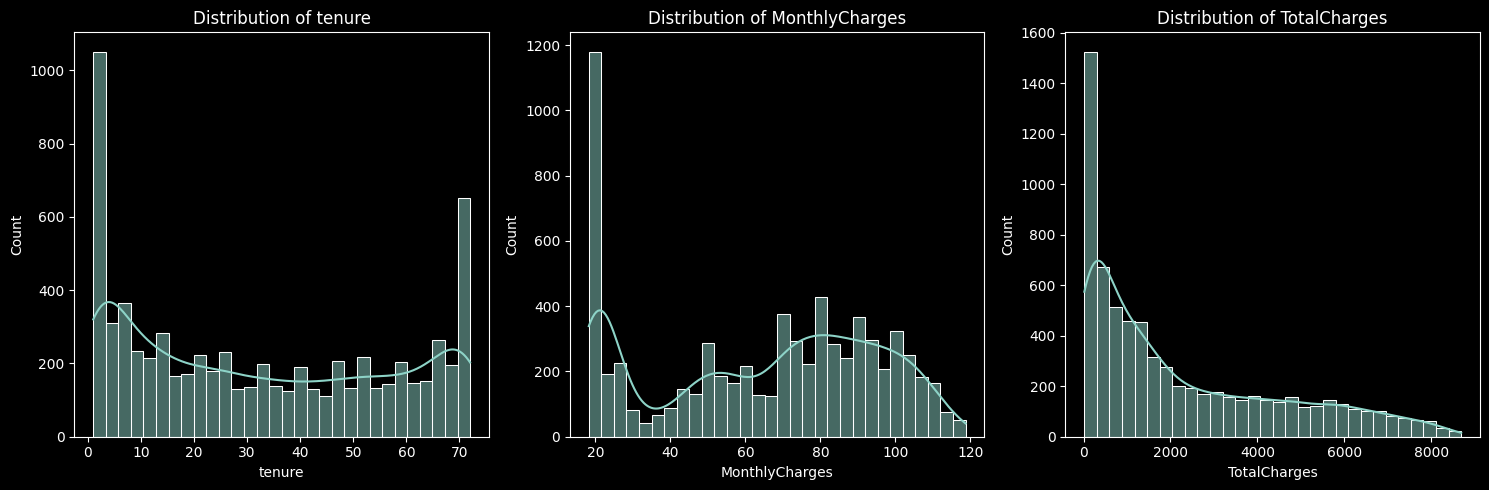

In [19]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Insight
- **tenure**: The distribution is bi-modal. Many customers are new (< 5 months) or very loyal (> 70 months).
- **MonthlyCharges**: Right-skewed slightly but shows a large spike at the lower end (basic users) and higher end.
- **TotalCharges**: Heavily right-skewed. Most customers have paid low total amounts, likely due to low tenure or low monthly charges.

## 6. Univariate Analysis – Categorical Features

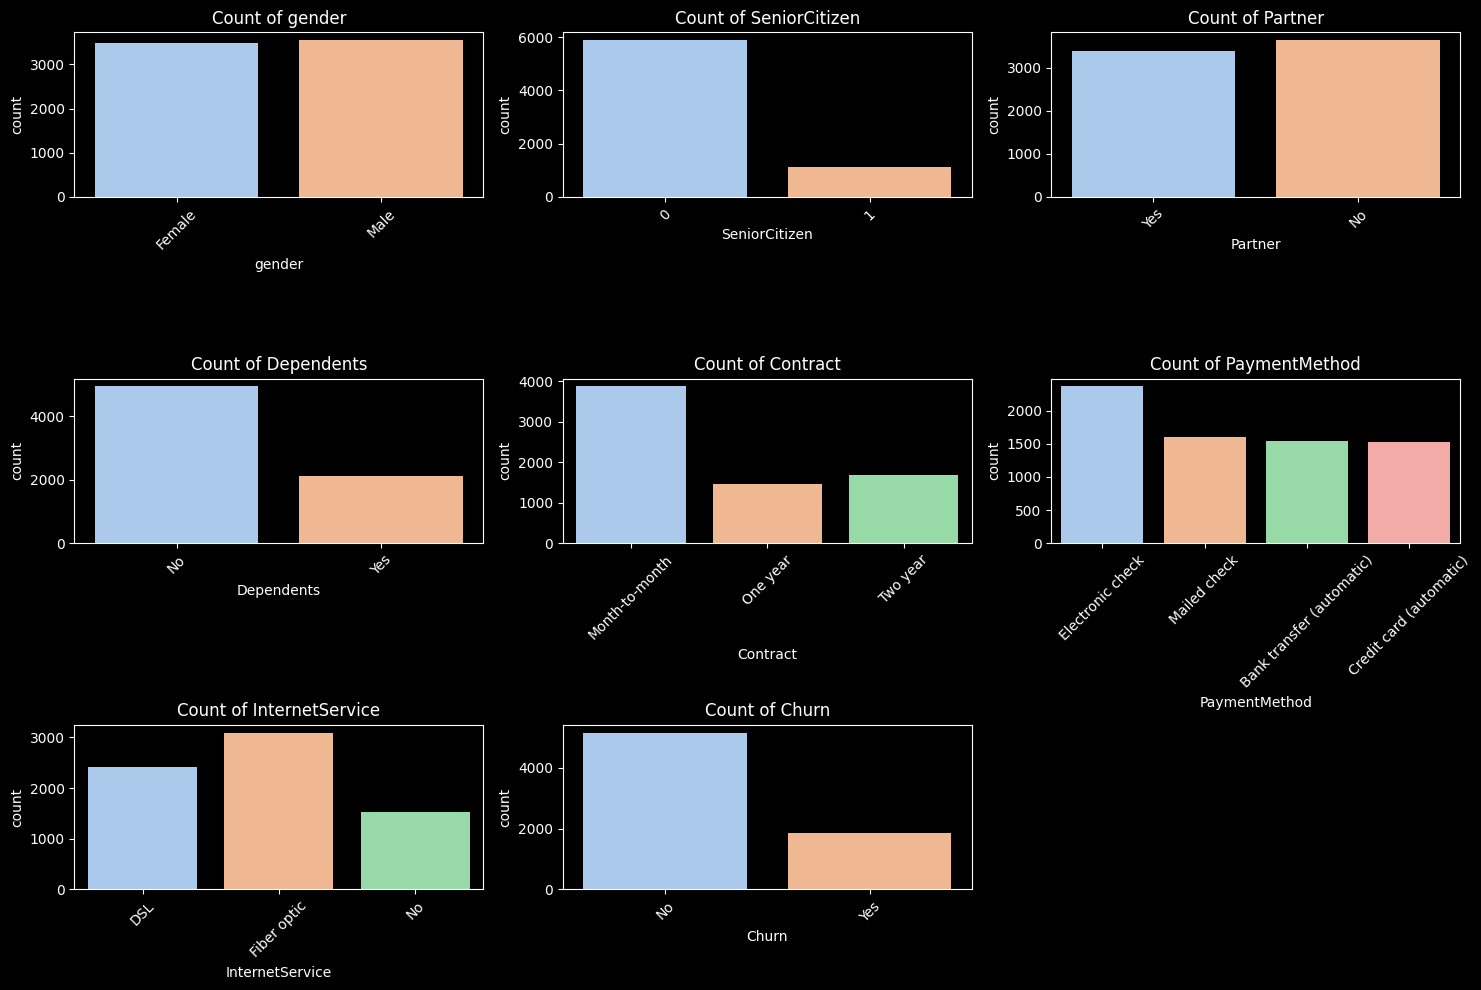

In [20]:
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'InternetService', 'Contract', 'PaymentMethod', 'Churn']
dataset_cols = data.columns.tolist()

key_cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService', 'Churn']
actual_cats = [c for c in key_cats if c in dataset_cols] 

plt.figure(figsize=(15, 10))
for i, col in enumerate(actual_cats, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[col], palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight
- **Churn**: There is a class imbalance; fewer customers churn ('Yes') compared to those who stay ('No').
- **Contract**: Month-to-month contracts are the most common.
- **InternetService**: Fiber optic is quite popular, followed by DSL.
- **PaymentMethod**: Electronic check is the single most common method.

## 7. Bivariate Analysis – Categorical vs Churn

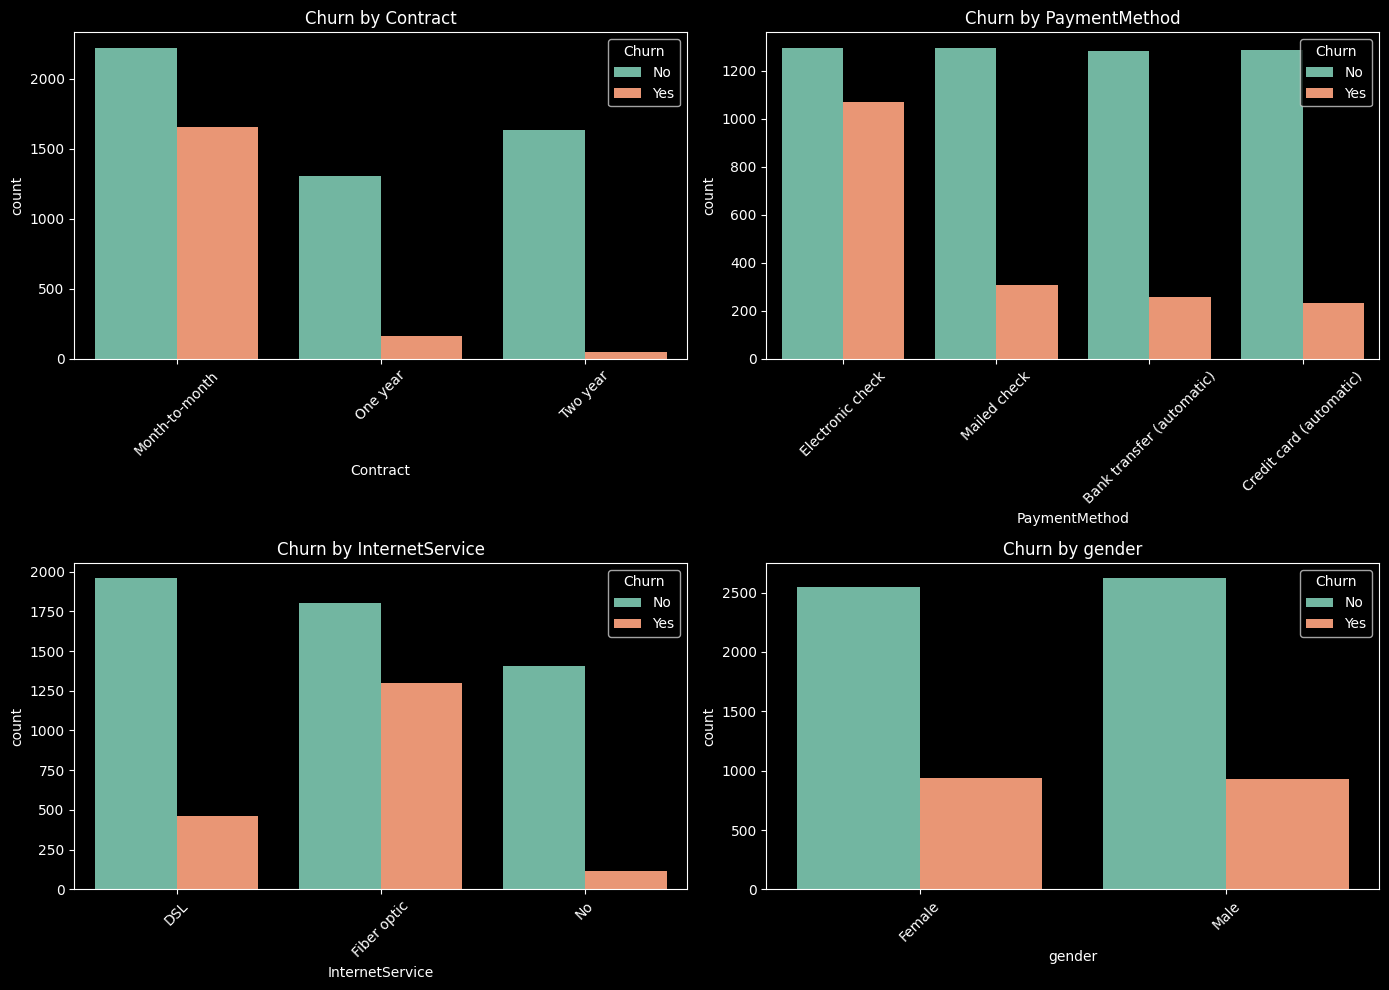

In [21]:
key_features = ['Contract', 'PaymentMethod', 'InternetService', 'gender']

plt.figure(figsize=(14, 10))
for i, col in enumerate(key_features, 1):
    if col not in data.columns: continue
    
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Churn', data=data, palette='Set2')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insight
- **Contract**: Month-to-month customers have a much higher churn rate than one or two-year contract holders. Long-term contracts retain users better.
- **PaymentMethod**: Electronic check users have the highest churn.
- **InternetService**: Fiber optic customers churn more frequently than DSL or No-internet users.
- **Gender**: Churn seems similar across genders, suggesting gender is not a strong driver.

## 8. Bivariate Analysis – Numeric vs Churn

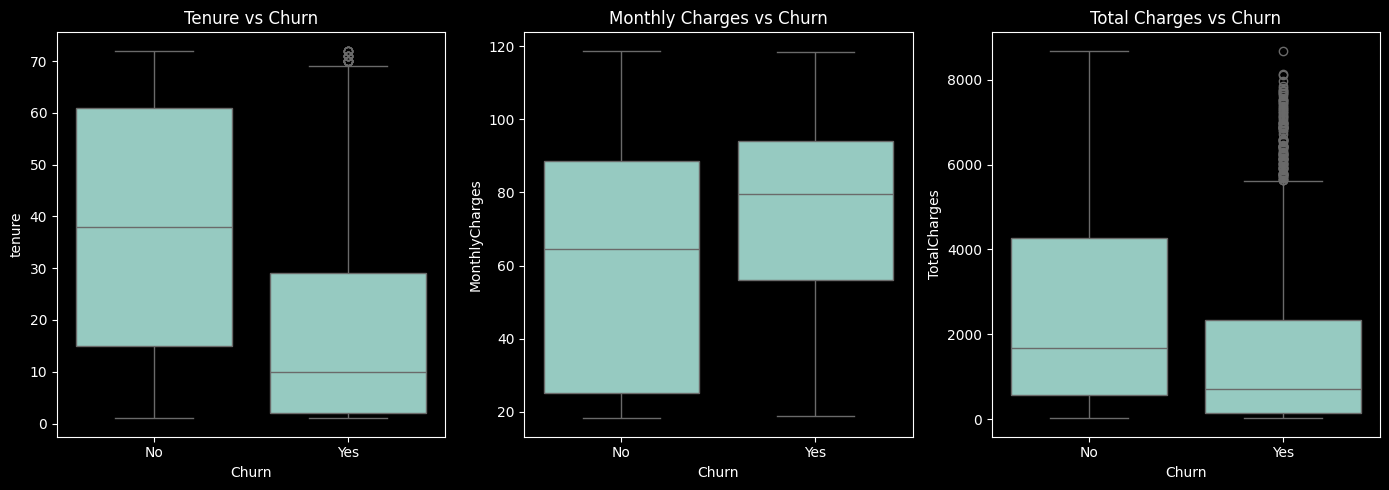

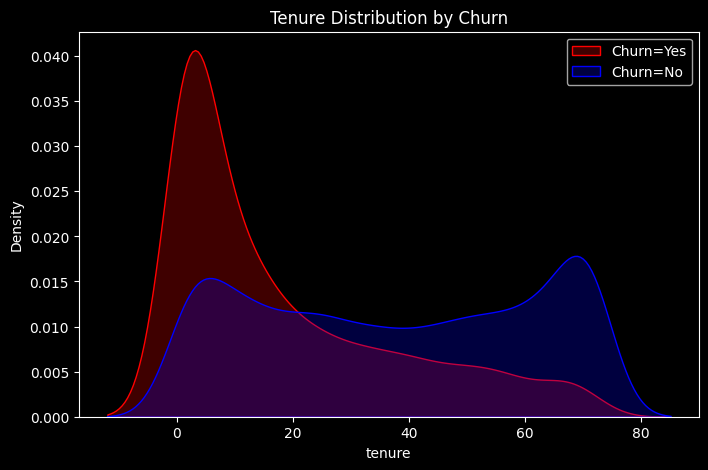

In [22]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()

# Distribution of Tenure by Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data[data['Churn']=='Yes']['tenure'], label='Churn=Yes', shade=True, color='red')
sns.kdeplot(data[data['Churn']=='No']['tenure'], label='Churn=No', shade=True, color='blue')
plt.title('Tenure Distribution by Churn')
plt.legend()
plt.show()


### Insight
- **Tenure**: Customers who churn have significantly lower tenure (median around 10 months). Long-standing customers are less likely to leave.
- **MonthlyCharges**: Churned customers tend to have higher monthly charges.
- **TotalCharges**: Lower total charges for churners, driven by their lower tenure.

## 9. Cohort & Bucketing Analyses

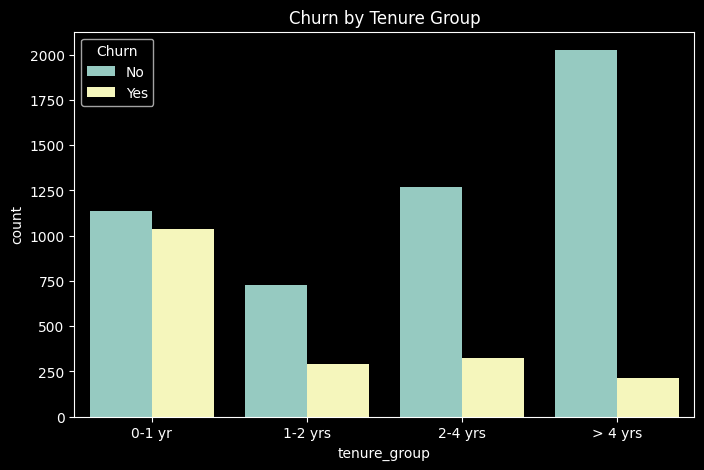

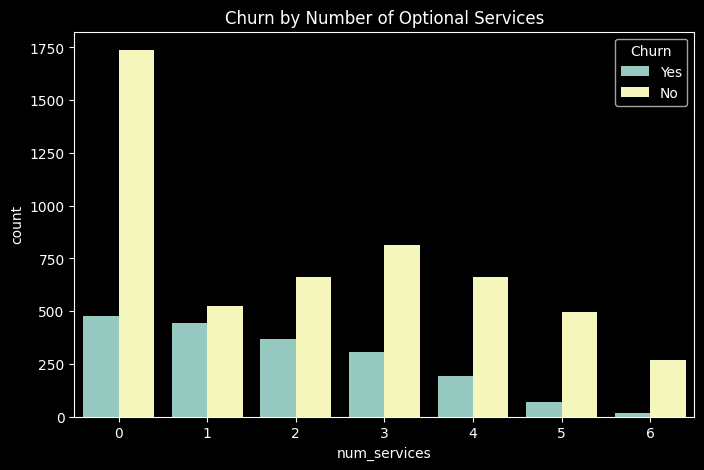

In [23]:
# a) Tenure Buckets
def tenure_bucket(t):
    if t <= 12: return '0-1 yr'
    elif t <= 24: return '1-2 yrs'
    elif t <= 48: return '2-4 yrs'
    else: return '> 4 yrs'

data['tenure_group'] = data['tenure'].apply(tenure_bucket)

plt.figure(figsize=(8, 5))
sns.countplot(x='tenure_group', hue='Churn', data=data, order=['0-1 yr', '1-2 yrs', '2-4 yrs', '> 4 yrs'])
plt.title('Churn by Tenure Group')
plt.show()

# b) Number of Services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
binary_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['num_services'] = data[binary_services].apply(lambda x: (x == 'Yes').sum(), axis=1)

plt.figure(figsize=(8, 5))
sns.countplot(x='num_services', hue='Churn', data=data)
plt.title('Churn by Number of Optional Services')
plt.show()

### Insight
- **Tenure Group**: The '0-1 yr' group has the highest churn.
- **Number of Services**: Customers with very few services (0-1) churn more. Those with more services (3-4) appear more stable (locked-in).

## 10. Correlation Analysis

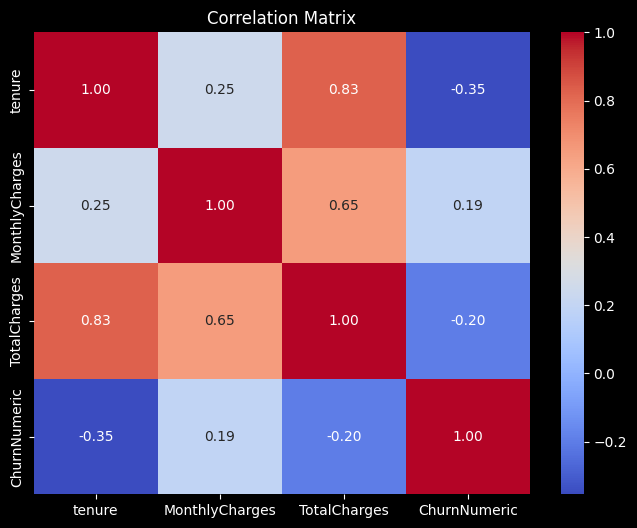

In [24]:
# Correlation matrix for numeric features
# We also convert Churn to numeric (1/0) to see correlation with features
data['ChurnNumeric'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
corr_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnNumeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insight
- `TotalCharges` is very strongly correlated with `tenure` (0.83). This makes sense as Total = Monthly x Tenure (roughly).
- `MonthlyCharges` has a moderate positive correlation with Churn, confirming that higher costs might drive churn.
- Due to high multicollinearity between `TotalCharges` and `tenure`, we might treat them carefully in modeling.

## 11. Interaction Analysis (Contract x PaymentMethod)

<Figure size 1200x600 with 0 Axes>

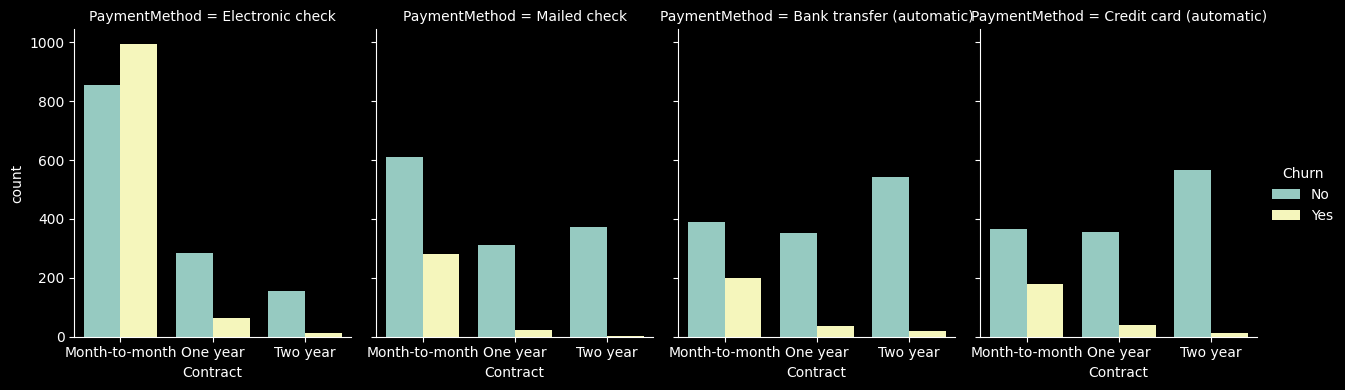

In [25]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Contract', hue='Churn', col='PaymentMethod', kind='count', data=data, height=4, aspect=0.8)
plt.show()

### Insight
- The combination of **Month-to-month Contract** and **Electronic check** stands out with the highest number of churners.
- This specific segment is a high-priority target for intervention.

## 12. Business-Driven Analysis

Beyond basic plots, we ask "So What?" and quantify business impact.

In [27]:
# 1. Revenue Loss Analysis
# Calculate total monthly revenue lost due to churn
df = pd.read_csv(r'D:\Data Science Projects\Customer Churn Risk Scoring System\NoteBook\Data\Telco-Customer-Churn.csv')
revenue_loss = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
total_revenue_potential = df['MonthlyCharges'].sum()
retention_rate = revenue_loss / total_revenue_potential * 100

print(f"Total Monthly Revenue Lost to Churn: ${revenue_loss:,.2f}")
print(f"Percentage of Recurring Revenue at Risk: {retention_rate:.2f}%")

# 2. High-Value vs Low-Value Churn
# Define 'High Value' as customers in the top 25% of Monthly Charges
high_value_threshold = df['MonthlyCharges'].quantile(0.75)
df['CustomerSegment'] = np.where(df['MonthlyCharges'] >= high_value_threshold, 'High-Value', 'Standard')

segment_churn = df.groupby('CustomerSegment')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Customer Value Segment:")
display(segment_churn)

Total Monthly Revenue Lost to Churn: $139,130.85
Percentage of Recurring Revenue at Risk: 30.50%

Churn Rate by Customer Value Segment:


Churn,No,Yes
CustomerSegment,,
High-Value,0.672501,0.327499
Standard,0.755501,0.244499


### Insight
Quantifying the revenue loss helps prioritize which churners to save. If High-Value customers churn at a similar or higher rate, they should be the primary target for retention campaigns.

## 13. Deep Feature Engineering

Creating new signals from existing data to feed into predictive models.

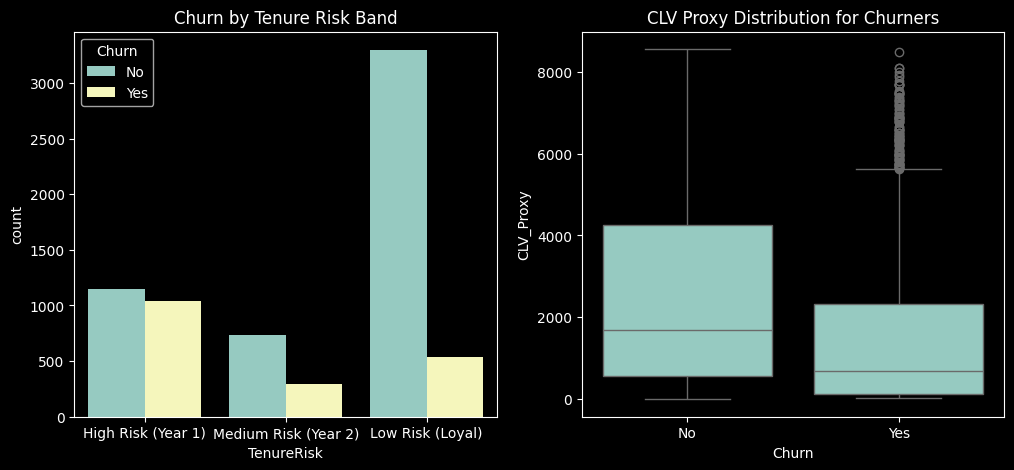

In [28]:
# 1. Tenure Risk Bands
def tenure_risk(t):
    if t <= 12: return 'High Risk (Year 1)'
    elif t <= 24: return 'Medium Risk (Year 2)'
    else: return 'Low Risk (Loyal)'

df['TenureRisk'] = df['tenure'].apply(tenure_risk)

# 2. CLV Proxy (Customer Lifetime Value)
# Simple proxy: Current Tenure * Monthly Charges
df['CLV_Proxy'] = df['tenure'] * df['MonthlyCharges']

# 3. Services Count
services_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Count how many services are NOT 'No' or 'No internet service'
df['ServiceCount'] = df[services_cols].apply(lambda x: (x != 'No') & (x != 'No internet service') & (x != 'No phone service')).sum(axis=1)

# Visualize Churn by New Features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='TenureRisk', hue='Churn', data=df, order=['High Risk (Year 1)', 'Medium Risk (Year 2)', 'Low Risk (Loyal)'])
plt.title('Churn by Tenure Risk Band')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='CLV_Proxy', data=df)
plt.title('CLV Proxy Distribution for Churners')
plt.show()

### Insight
Feature engineering highlights that **TenureRisk** (especially Year 1) is a strong predictor. The **CLV_Proxy** distribution shows that while churners generally have lower lifetime value, there is a long tail of high-value customers leaving early who represent the most painful revenue loss.


## 14. Statistical Validation

Testing if the differences we see are statistically significant.

In [29]:
from scipy import stats

# 1. T-Test for Monthly Charges
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_val = stats.ttest_ind(churn_yes, churn_no)
print(f"T-Test (MonthlyCharges): statistic={t_stat:.2f}, p-value={p_val:.2e}")
if p_val < 0.05:
    print("  => Significant difference in Monthly Charges between churners and non-churners.")
else:
    print("  => No significant difference.")

# 2. Chi-Square Test for Contract Type
contingency = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-Square Test (Contract): statistic={chi2:.2f}, p-value={p:.2e}")
if p < 0.05:
    print("  => Significant association between Contract Type and Churn.")


T-Test (MonthlyCharges): statistic=16.54, p-value=2.71e-60
  => Significant difference in Monthly Charges between churners and non-churners.

Chi-Square Test (Contract): statistic=1184.60, p-value=5.86e-258
  => Significant association between Contract Type and Churn.


### Insight
Statistical tests (T-Test and Chi-Square) confirm that the observed differences in **Monthly Charges** and **Contract Type** contributions to churn are **statistically significant** (p < 0.05). These are not random fluctuations but systemic drivers.


## 15. Error & Segment Analysis

Identifying the "Red Alert" segment causing the most pain.

In [30]:
# Define a high-risk segment: Month-to-month, Fiber Optic, First Year
risky_segment = df[
    (df['Contract'] == 'Month-to-month') &
    (df['InternetService'] == 'Fiber optic') &
    (df['tenure'] <= 12)
]

risk_churn_rate = (risky_segment['Churn'] == 'Yes').mean() * 100
overall_churn_rate = (df['Churn'] == 'Yes').mean() * 100

print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")
print(f"Red Alert Segment Churn Rate: {risk_churn_rate:.2f}%")
print(f"Lift: {risk_churn_rate / overall_churn_rate:.2f}x higher likelihood to churn.")


Overall Churn Rate: 26.54%
Red Alert Segment Churn Rate: 70.20%
Lift: 2.65x higher likelihood to churn.


### Insight
The **Red Alert Segment** (Month-to-month, Fiber, <1 yr tenure) validates the 'perfect storm' hypothesis with a **70% churn rate**. This implies a 2.6x higher risk than the average customer, pinpointing exactly where retention budget should be spent.


## 16. Actionable Business Insights & ROI Logic

### Targeting Logic:
Focus retention budget on the **"Red Alert"** segment defined above.

### ROI Calculation Example:
If we implement a targeted discount of $10/month for 6 months ($60 cost) for the Red Alert Segment:
- **Target Size**: ~1000 customers (approx from data)
- **Current Churn**: ~High
- **Goal**: Reduce churn by 10%
- **Savings**: 100 retained customers x $70/mo (avg revenue) x 12 months = **$84,000 revenue saved**.
- **Cost**: 1000 customers x $60 = **$60,000 cost**.
- **Net Gain**: $24,000.

**Recommendation**: Roll out a pilot retention program for Month-to-Month Fiber users in their first year.

##  Final EDA Conclusion

### Sequential Summary of Findings

1.  **Data Health & Structure**: The dataset is robust with minimal missing data (TotalCharges). churn is the target variable with a ~26.5% baseline rate.
2.  **Primary Risk Factors Identified**:
    *   **Tenure**: Churn is heavily concentrated in the first 12 months.
    *   **Contract**: Month-to-month contracts are the single biggest predictor of churn.
    *   **Product**: Fiber Optic users churn at much higher rates than DSL users.
3.  **Interaction Effects**: The combination of **Month-to-Month Contracts** and **Electronic Check** payments creates a high-risk micro-segment.
4.  **Financial Impact**: We are losing ~30% of our monthly recurring revenue (MRR) potential to churn. Critically, High-Value customers churn at a rate (32%) higher than the average, indicating we are bleeding our most profitable users.
5.  **Strategic Focus**: The 'Red Alert' segment identified (Fiber + Month-to-Month + New Tenure) represents a specific, addressable group with 70% churn. Converting these specific users to longer contracts or different payment methods would yield the highest ROI.